## Import Libraries

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

## Loading all Data

In [8]:
train = pd.read_csv(r'C:\Users\Maged\Desktop\TASK 7\Walmart_CSVs\train.csv')
features = pd.read_csv(r'C:\Users\Maged\Desktop\TASK 7\Walmart_CSVs\features.csv')
stores = pd.read_csv(r'C:\Users\Maged\Desktop\TASK 7\Walmart_CSVs\stores.csv')   

## Merging Datasets

In [11]:
data = pd.merge(train, features, on=['Store', 'Date', 'IsHoliday'], how='left')
data = pd.merge(data, stores, on='Store', how='left')   # Merge Store Metadata

## Process data

In [14]:
data['Date'] = pd.to_datetime(data['Date'])
monthly_sales = data.groupby(pd.Grouper(key='Date', freq='M')).agg({'Weekly_Sales':'sum'}).reset_index()
monthly_sales = monthly_sales.sort_values('Date')

C:\Users\Maged\AppData\Local\Temp\ipykernel_1708\2414135010.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = data.groupby(pd.Grouper(key='Date', freq='M')).agg({'Weekly_Sales':'sum'}).reset_index()


## **Visualizations**

### 1. Plot Monthly Sales Trend

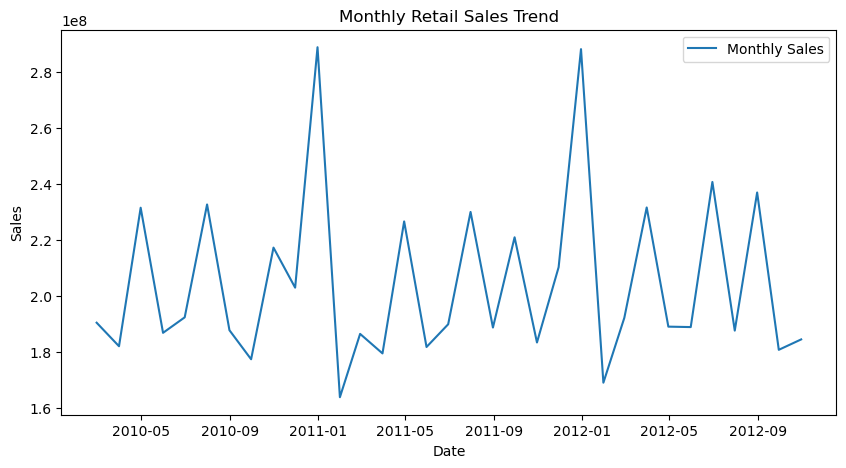

In [20]:
plt.figure(figsize=(10,5))
plt.plot(monthly_sales['Date'], monthly_sales['Weekly_Sales'], label='Monthly Sales')
plt.title('Monthly Retail Sales Trend')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

### 2. Plot Moving Averages

In [23]:
monthly_sales['MA_3'] = monthly_sales['Weekly_Sales'].rolling(window=3).mean()
monthly_sales['MA_6'] = monthly_sales['Weekly_Sales'].rolling(window=6).mean()

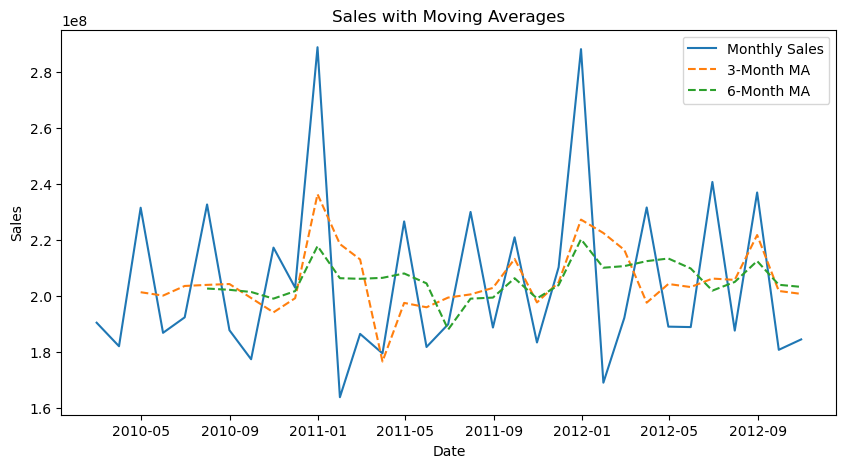

In [27]:
plt.figure(figsize=(10,5))
plt.plot(monthly_sales['Date'], monthly_sales['Weekly_Sales'], label='Monthly Sales')
plt.plot(monthly_sales['Date'], monthly_sales['MA_3'], label='3-Month MA', linestyle='--')
plt.plot(monthly_sales['Date'], monthly_sales['MA_6'], label='6-Month MA', linestyle='--')
plt.title('Sales with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

### 3. Plot Seasonal Patterns

In [29]:
monthly_sales['Month'] = monthly_sales['Date'].dt.month
monthly_avg = monthly_sales.groupby('Month')['Weekly_Sales'].mean()

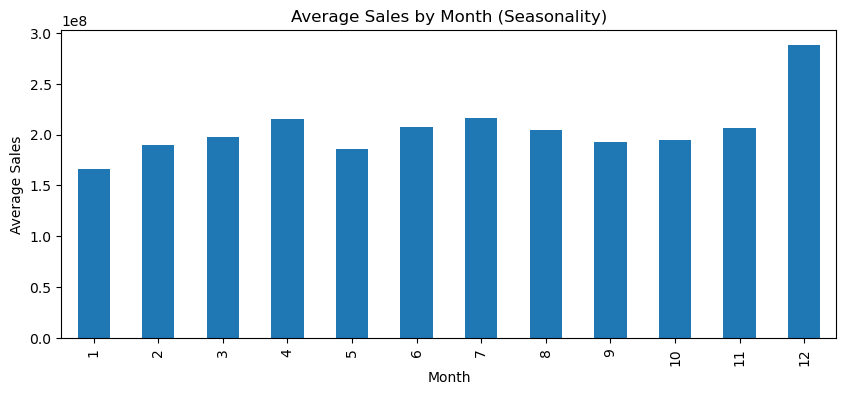

In [32]:
plt.figure(figsize=(10,4))
monthly_avg.plot(kind='bar')
plt.title('Average Sales by Month (Seasonality)')
plt.xlabel('Month')
plt.ylabel('Average Sales')
plt.show()

### 4. Plot Revenue Breakdown by Product

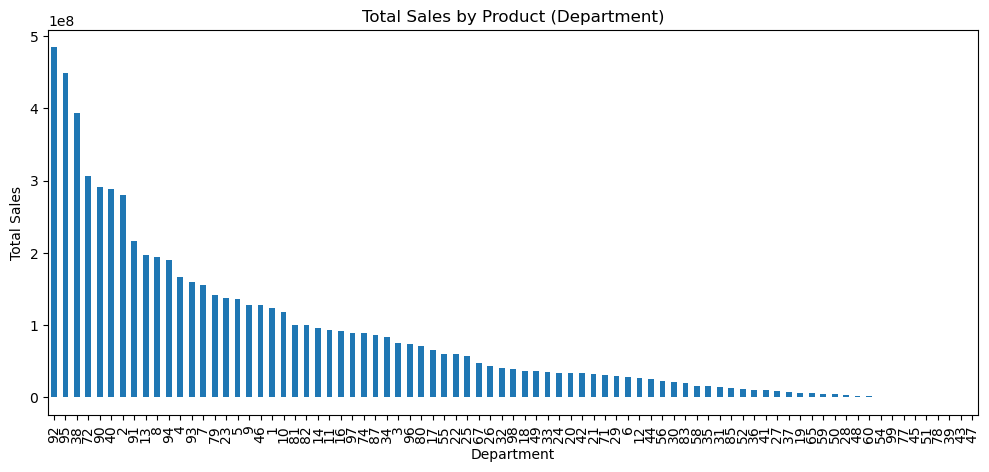

In [41]:
dept_sales = train.groupby('Dept')['Weekly_Sales'].sum().sort_values(ascending=False)
plt.figure(figsize=(12,5))
dept_sales.plot(kind='bar')
plt.title('Total Sales by Product (Department)')
plt.xlabel('Department')
plt.ylabel('Total Sales')
plt.show()

### 5. Plot Revenue Breakdown by Store Type

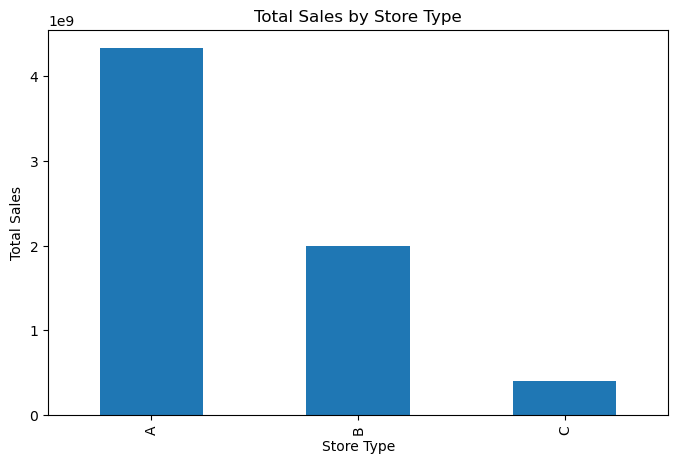

In [48]:
store_type_sales = data.groupby('Type')['Weekly_Sales'].sum()
plt.figure(figsize=(8,5))
store_type_sales.plot(kind='bar')
plt.title('Total Sales by Store Type')
plt.xlabel('Store Type')
plt.ylabel('Total Sales')
plt.show()

### 6. Plot Forecasting (Exponential Smoothing)

In [51]:
model = SimpleExpSmoothing(monthly_sales['Weekly_Sales']).fit(smoothing_level=0.2, optimized=False)
monthly_sales['Exp_Smooth'] = model.fittedvalues
forecast = model.forecast(1)

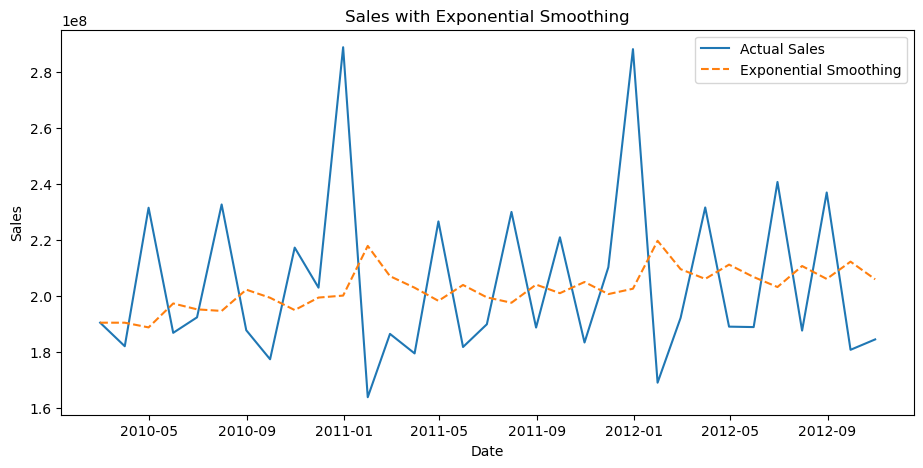

In [55]:
plt.figure(figsize=(11,5))
plt.plot(monthly_sales['Date'], monthly_sales['Weekly_Sales'], label='Actual Sales')
plt.plot(monthly_sales['Date'], monthly_sales['Exp_Smooth'], label='Exponential Smoothing', linestyle='--')
plt.title('Sales with Exponential Smoothing')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

---